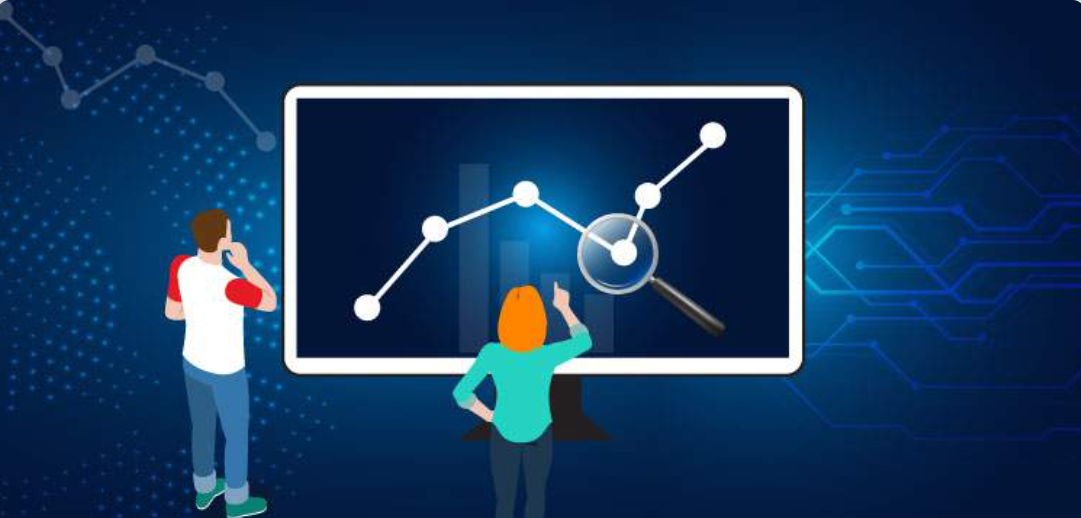

#Context

Working in the Data Science team of an ad and marketing based company, trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

#Know Your Data

In [9]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)
pd.options.display.max_colwidth = 1000
sns.set(style = 'darkgrid')

In [10]:
df1 = pd.read_csv("train_1.csv")
df1.shape

(145063, 551)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [12]:
df1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-22,2015-08-23,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-29,2015-08-30,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-05,2015-09-06,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-12,2015-09-13,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-19,2015-09-20,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-26,2015-09-27,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-03,2015-10-04,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-10,2015-10-11,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-17,2015-10-18,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-24,2015-10-25,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-10-31,2015-11-01,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-07,2015-11-08,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-14,2015-11-15,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-21,2015-11-22,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-28,2015-11-29,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-05,2015-12-06,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-12,2015-12-13,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-19,2015-12-20,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,2016-02-11,2016-02-12,2016-02-13,2016-02-14,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-20,2016-02-21,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-27,2016-02-28,2016-02-29,2016-03-01,2016-03-02,2016-03-03,2016-03-04,2016-03-05,2016-03-06,2016-03-07,2016-03-08,2016-03-09,2016-03-10,2016-03-11,2016-03-12,2016-03-13,2016-03-14,2016-03-15,2016-03-16,2016-03-17,2016-03-18,2016-03-19,2016-03-20,2016-03-21,2016-03-22,2016-03-23,2016-03-24,2016-03-25,2016-03-26,2016-03-27,2016-03-28,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,2016-04-11,2016-04-12,2016-04-13,2016-04-14,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,2016-05-11,2016-05-12,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,2016-06-11,2016-06-12,2016-06-13,2016-06-14,2016-06-15,2016-06-16,2016-06-17,2016-06-18,2016-06-19,2016-06-20,2016-06-21,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2

In [13]:
Exog_Campaign_eng=pd.read_csv('Exog_Campaign_eng')

In [14]:
Exog_Campaign_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exog    550 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


In [15]:
Exog_Campaign_eng.head()

,Exog
0,0
1,0
2,0
3,0
4,0


- There are 145063 rows and 551 columns signifying per page view report for different wikipedia pages for 550 days
- Other dataset named 'Exog_Campaign_eng' has 550 rows and 1 column,  There’s 1 for dates with campaigns and 0 for remaining dates. It is to be treated as an exogenous variable for models when training and forecasting data for pages in English

# Data Preprocessing

##Treatment of Null Values

In [16]:
# Check missing values
missing_values = df1.isnull().sum().sum()
print(f"Total missing values: {missing_values}")

Total missing values: 6192931


**Visualization of Null values using Heatmap**

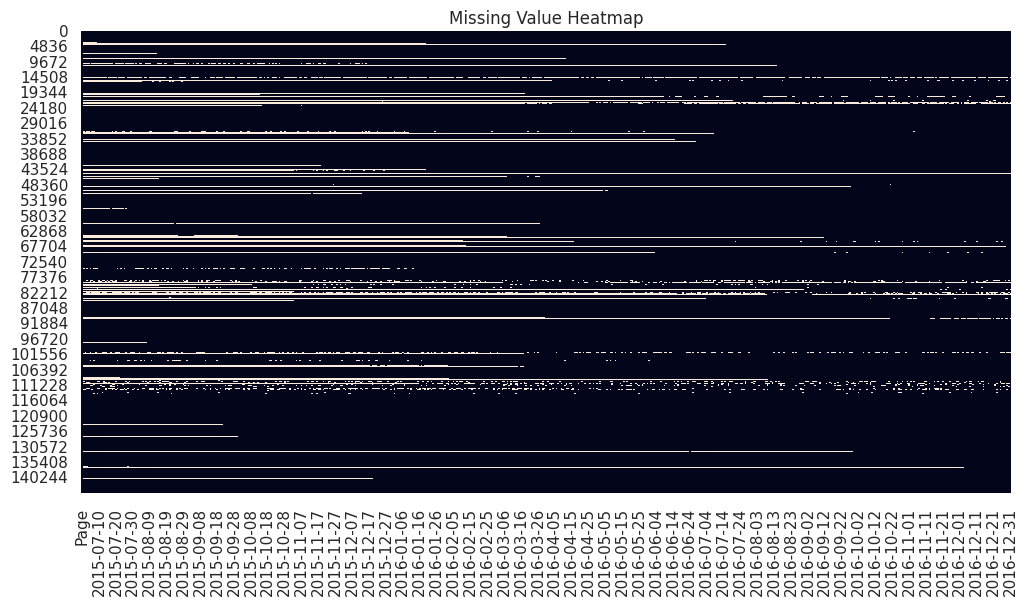

In [17]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df1.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

From the visualization of missing value patterns using heatmap plot and understanding data overview it is inferred that missing values are mainly at the start of the series for any row. It could be signifying that the page was not active or operational in that time period.

**Treatment of null values**

- For the Null values in the beginning of any time series (non-operational period) is simply replaced by 0
- For the null values within operational periods or active time range are filled using Linear Interpolation based on trends.

In [18]:
df=df1.copy()

In [19]:
def fill_initial_nans_with_zero(row):
    """
    Replace initial NaNs in a row with 0 until the first non-NaN value is encountered.
    """
    # Find the positional index of the first valid (non-NaN) value
    first_valid_index = row.first_valid_index()

    if first_valid_index is not None:
        first_valid_pos = row.index.get_loc(first_valid_index)  # Get the positional index
        row.iloc[:first_valid_pos] = 0  # Replace initial NaNs with 0
    return row

# Apply the function to replace initial NaNs with 0
df.iloc[:, 1:] = df.iloc[:, 1:].apply(fill_initial_nans_with_zero, axis=1)

# Apply linear interpolation for gaps within the time series
df.iloc[:, 1:] = df.iloc[:, 1:].interpolate(method='linear', axis=1)

# Replace any remaining NaN values with 0 (if interpolation couldn't fill them)
df.fillna(0, inplace=True)

In [20]:
# Display a summary of missing values after cleaning
print(f"Total missing values after cleaning: {df.isnull().sum().sum()}")

Total missing values after cleaning: 0


##Feature Engineering

####Separating Features from Page column

**Split the 'Page' column to extract the following:**

Title: Specific name of the page.

Language: Language code (e.g., en, de).

Access Type: Device type (desktop, mobile-web, etc.).

Access Origin: Request origin (spider, agent).

In [21]:
# Split 'page' column into separate components
def split_page_column(dfsample):
    dfsample[['title', 'language', 'access_type', 'access_origin']] = dfsample['Page'].str.extract(
        r'^(.*?)_([a-z]{2})\.wikipedia\.org_(.*?)_(.*)$'
    )
    return dfsample

train_data = split_page_column(df)

# Check the new columns
print(train_data[['title', 'language', 'access_type', 'access_origin']].head())


              title language access_type access_origin
0              2NE1       zh  all-access        spider
1               2PM       zh  all-access        spider
2                3C       zh  all-access        spider
3           4minute       zh  all-access        spider
4  52_Hz_I_Love_You       zh  all-access        spider


In [22]:
language_map = {
    'en': 'English',
    'de': 'German',
    'es': 'Spanish',
    'fr': 'French',
    'ja': 'Japanese',
    'ru': 'Russian',
    'zh': 'Chinese'
}

# Replace language codes with names
train_data['language'] = train_data['language'].map(language_map)

#Exploratory Data Analysis

**Distribution of Variables**

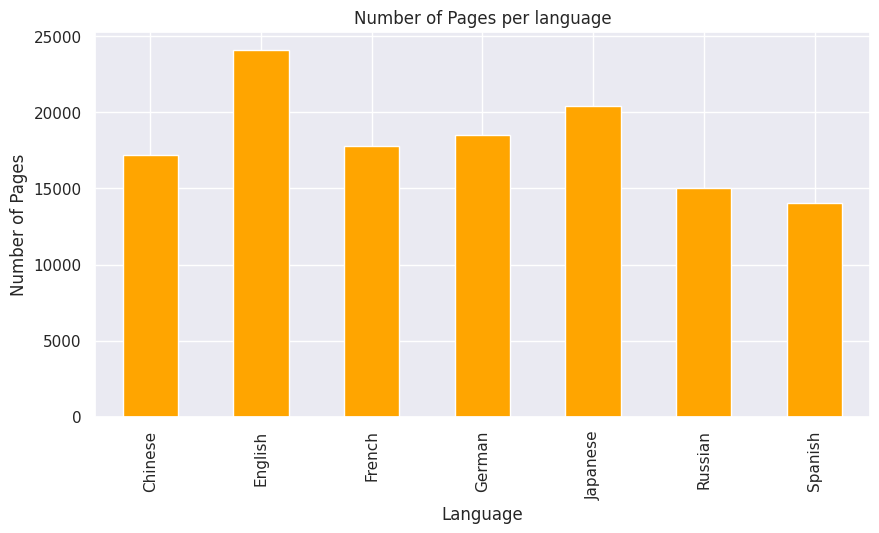

In [23]:
plt.figure(figsize=(10, 5))

train_data.groupby("language")["Page"].count().plot(kind="bar", color='orange')
plt.xlabel("Language")
plt.ylabel("Number of Pages")
plt.title("Number of Pages per language")
plt.show()

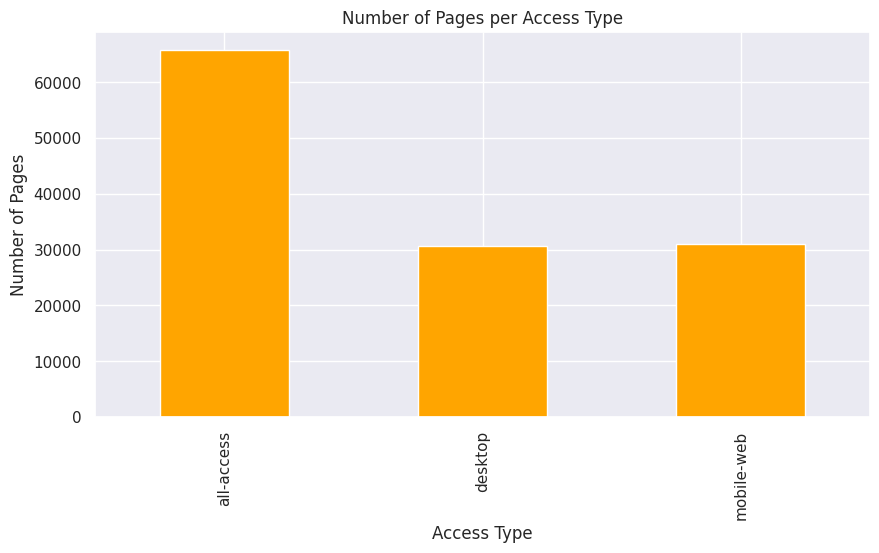

In [24]:
plt.figure(figsize=(10, 5))

train_data.groupby("access_type")["Page"].count().plot(kind="bar", color='orange')
plt.xlabel("Access Type")
plt.ylabel("Number of Pages")
plt.title("Number of Pages per Access Type")
plt.show()

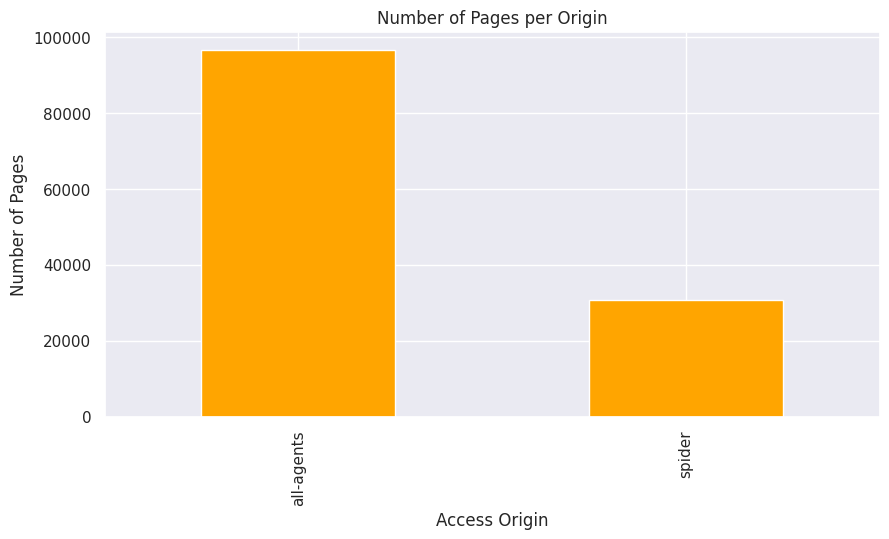

In [25]:
plt.figure(figsize=(10, 5))

train_data.groupby("access_origin")["Page"].count().plot(kind="bar", color='orange')
plt.xlabel("Access Origin")
plt.ylabel("Number of Pages")
plt.title("Number of Pages per Origin")
plt.show()

Highlights:
- Highest number of pages belong to English language followed by Japanese and German
- 'all-access' has highest number of pages followed by desktop and mobile-web
- Highest number of pages belong to 'all-agents' (almost 1 lac) followed by 'spider' with almost 30k pages only

##Plot Time series w.r.t each Language

In [26]:
# Select numeric columns only
numeric_columns = train_data.select_dtypes(include=['number'])

# Add the 'language' column for grouping
data_for_grouping = pd.concat([train_data['language'], numeric_columns], axis=1)

# Group by 'language' and calculate the mean
language_means = data_for_grouping.groupby('language').mean()

In [27]:
language_means.shape

(7, 550)

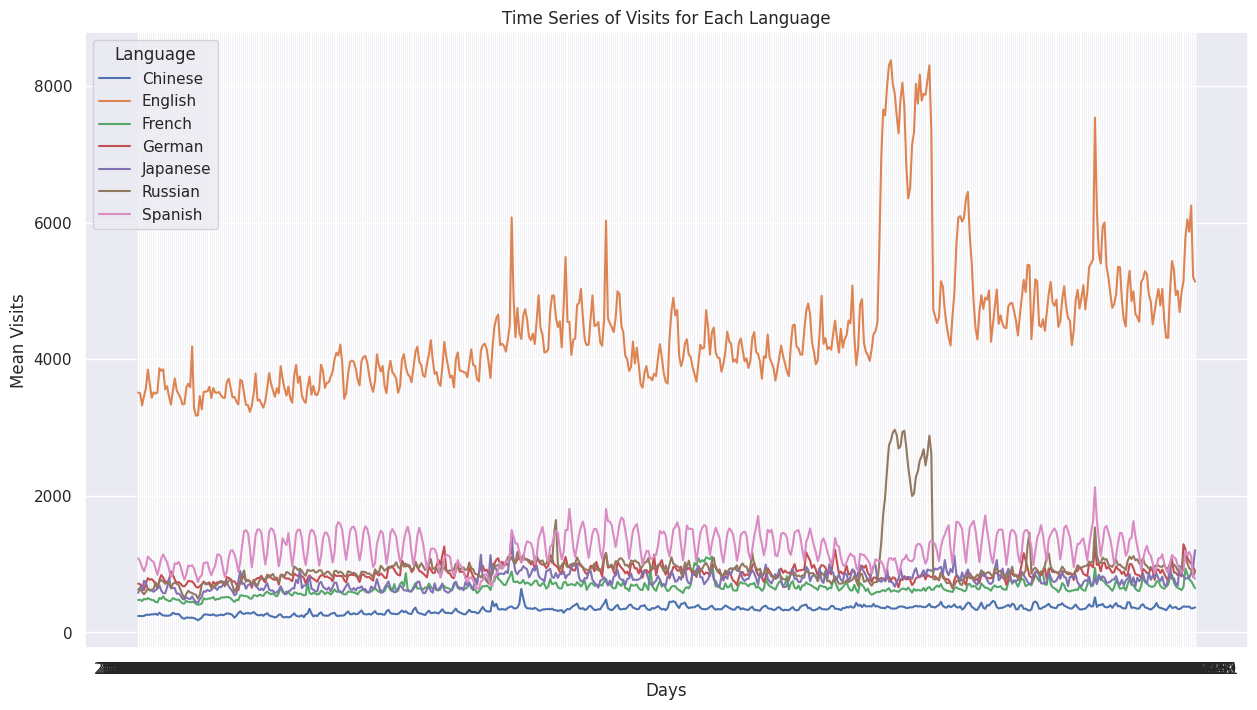

In [28]:
# Transpose the DataFrame to have days on the index and languages as columns
language_time_series_transposed = language_means.T

# Plot the time series for each language
plt.figure(figsize=(15, 8))

for language in language_time_series_transposed.columns:
    plt.plot(language_time_series_transposed.index, language_time_series_transposed[language], label=language)

# Adding labels and legend
plt.title("Time Series of Visits for Each Language")
plt.xlabel("Days")
plt.ylabel("Mean Visits")
plt.legend(title="Language")
plt.show()

##Analysing Time Series for English Lanaguage Page Visits

In [29]:
English_TS=language_time_series_transposed['English']

In [30]:
English_TS.shape

(550,)

#Dickey-Fuller Test

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
# Perform the Dickey-Fuller test
result = adfuller(English_TS, autolag='AIC')

# Extract test statistics
adf_stat = result[0]
p_value = result[1]
critical_values = result[4]

# Print the results
print("Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_stat}")
print(f"p-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")

# Interpretation
if p_value < 0.05:
    print("\nThe time series is stationary (reject the null hypothesis).")
else:
    print("\nThe time series is not stationary (fail to reject the null hypothesis).")

Dickey-Fuller Test Results:
ADF Statistic: -2.242334930109971
p-value: 0.19124051429303485
Critical Values:
  1%: -3.4426321555520905
  5%: -2.86695748394138
  10%: -2.5696553279762426

The time series is not stationary (fail to reject the null hypothesis).


Time Series for English Language is not stationary. Will go for Decomposition to check for non stationarity

#Decomposition

Visualize the trend, seasonality, and residuals (random noise) to confirm the presence of trend or seasonality, which causes non-stationarity.

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

**Autocorrelation Function (ACF) to verify the period**

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

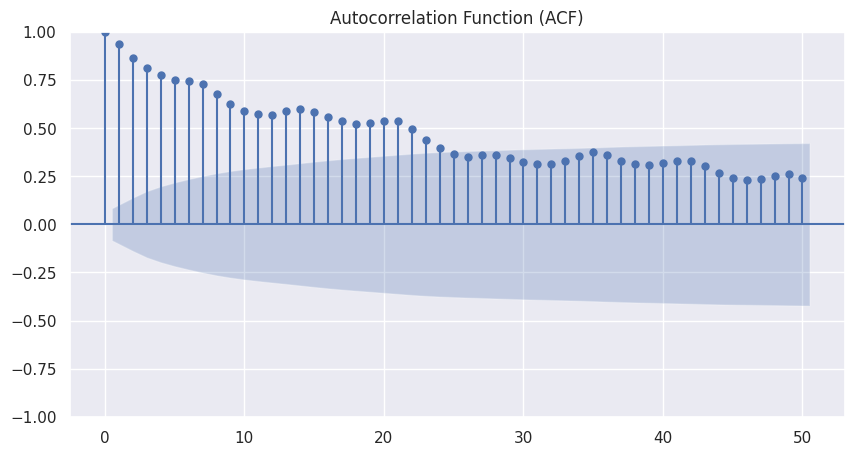

In [35]:
plt.rcParams['figure.figsize'] = (10, 5)
plot_acf(English_TS, lags=50)
plt.title('Autocorrelation Function (ACF)')
plt.show()

The ACF helps identify seasonality by showing correlations between lagged values. Peaks at multiples of 7 in the ACF plot indicate weekly seasonality. Therefore, we will select period=7 to perform decomposition.

In [36]:
English_TS.index = pd.to_datetime(English_TS.index)

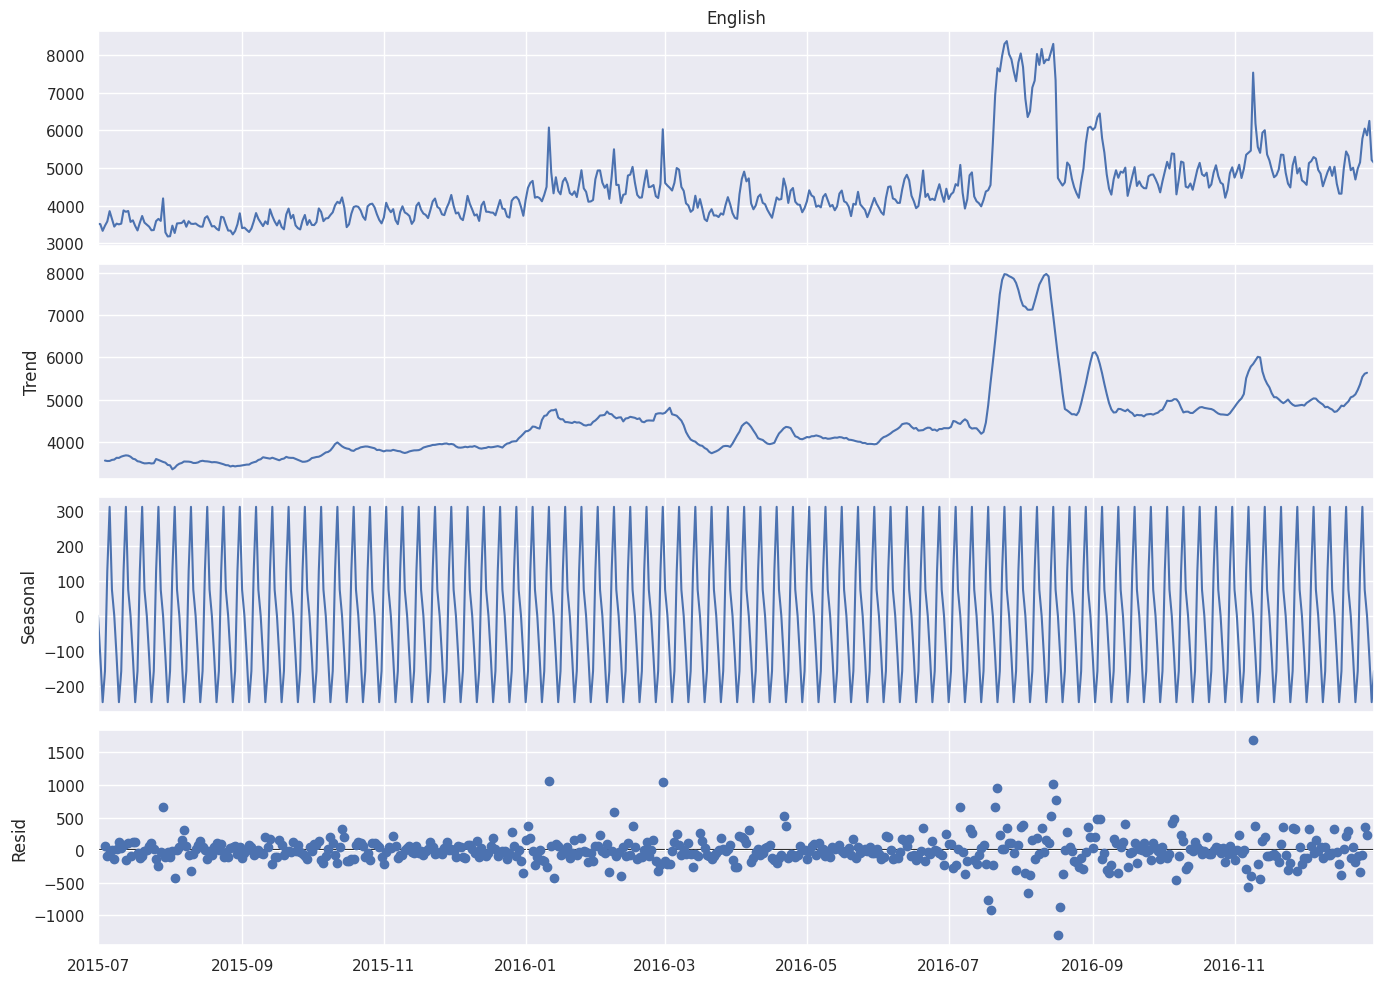

In [37]:
# Perform decomposition
plt.rcParams['figure.figsize'] = (14, 10)
decomposition = seasonal_decompose(English_TS, model='additive', period=7)
decomposition.plot()
plt.show()



ACF Plot and Decomposition- Seasonal component confirms weekly seasonality in data.



##Analysing Residual from Decomposition to further check for Stationarity

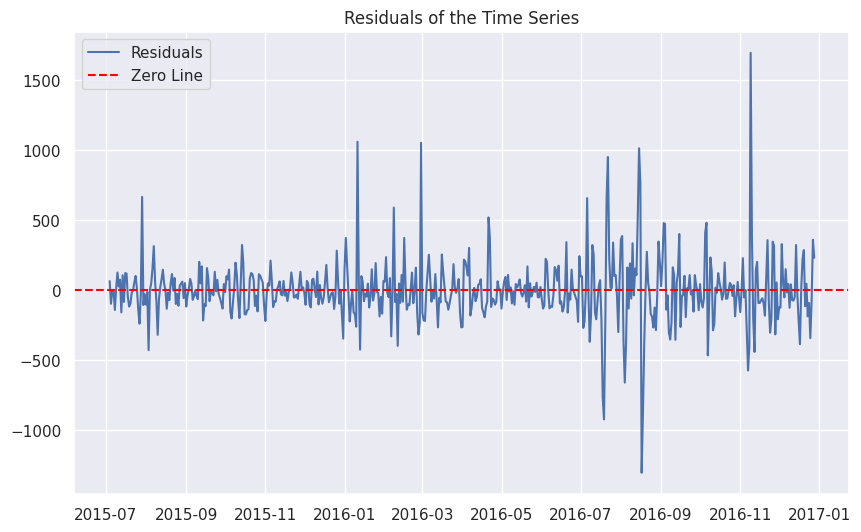

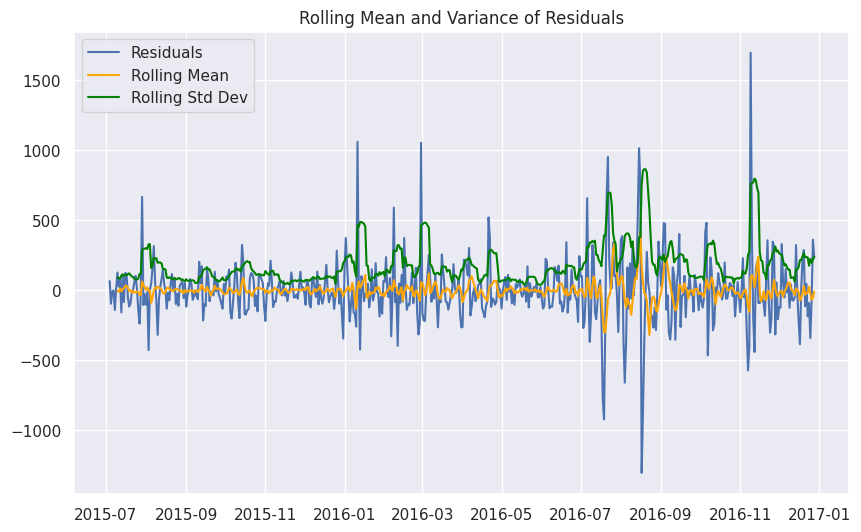

In [38]:
# Assuming `decomposed` is the result of seasonal_decompose
residuals = decomposition.resid

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals")
plt.axhline(0, color='red', linestyle='--', label="Zero Line")
plt.title("Residuals of the Time Series")
plt.legend()
plt.show()

# Plot rolling mean and variance
rolling_mean = residuals.rolling(window=7).mean()
rolling_std = residuals.rolling(window=7).std()

plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals")
plt.plot(rolling_mean, color='orange', label="Rolling Mean")
plt.plot(rolling_std, color='green', label="Rolling Std Dev")
plt.title("Rolling Mean and Variance of Residuals")
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

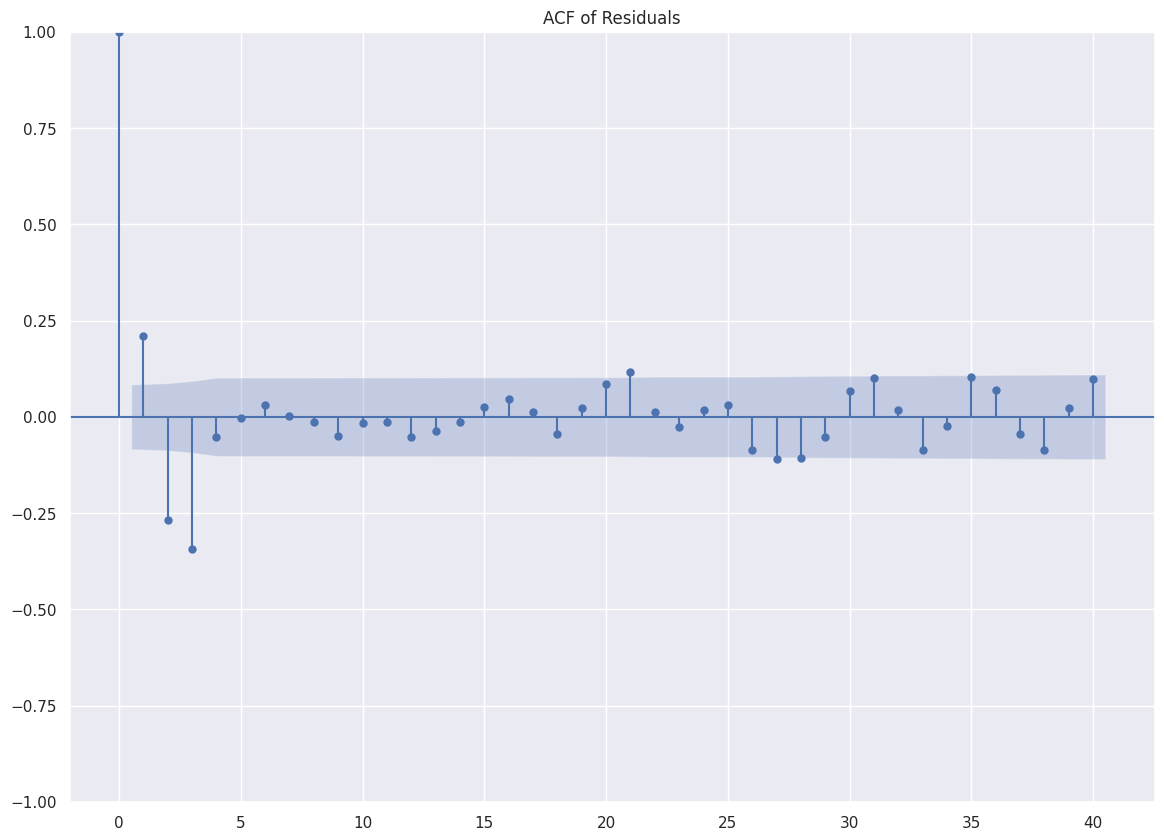

In [39]:
plt.figure(figsize=(10, 6))
plot_acf(residuals.dropna(), lags=40)
plt.title("ACF of Residuals")
plt.show()

Highlights:

- Rolling Mean and Variance of Residuals is not constant over time, inferring non-stationarity
- ACF of Residuals looks persistent suggesting non-stationarity

#Differencing

Since the time series is not stationary, we will try Differencing to make it stationary

In [40]:
English_TS_diff = English_TS.diff().dropna()

In [41]:
# Perform the Dickey-Fuller test
result = adfuller(English_TS_diff, autolag='AIC')

# Extract test statistics
adf_stat = result[0]
p_value = result[1]
critical_values = result[4]

# Print the results
print("Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_stat}")
print(f"p-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")

# Interpretation
if p_value < 0.05:
    print("\nThe time series is stationary (reject the null hypothesis).")
else:
    print("\nThe time series is not stationary (fail to reject the null hypothesis).")

Dickey-Fuller Test Results:
ADF Statistic: -8.254141158116967
p-value: 5.292846110351564e-13
Critical Values:
  1%: -3.4426321555520905
  5%: -2.86695748394138
  10%: -2.5696553279762426

The time series is stationary (reject the null hypothesis).


After First Order Differencing, Time Series become stationary. So further we can use d=1 as parameter for ARIMA

#ACF and PACF Plot

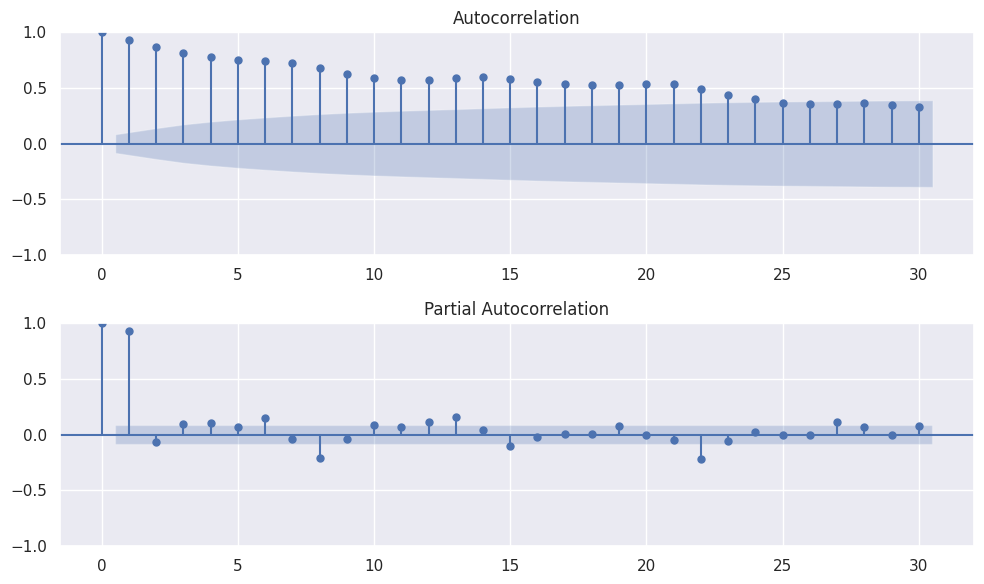

In [42]:
plt.figure(figsize=(10, 6))
plt.subplot(211)
plot_acf(English_TS, ax=plt.gca(), lags=30)  # ACF for MA terms
plt.subplot(212)
plot_pacf(English_TS, ax=plt.gca(), lags=30)  # PACF for AR terms
plt.tight_layout()
plt.show()


##Checking ACF plot post Differencing

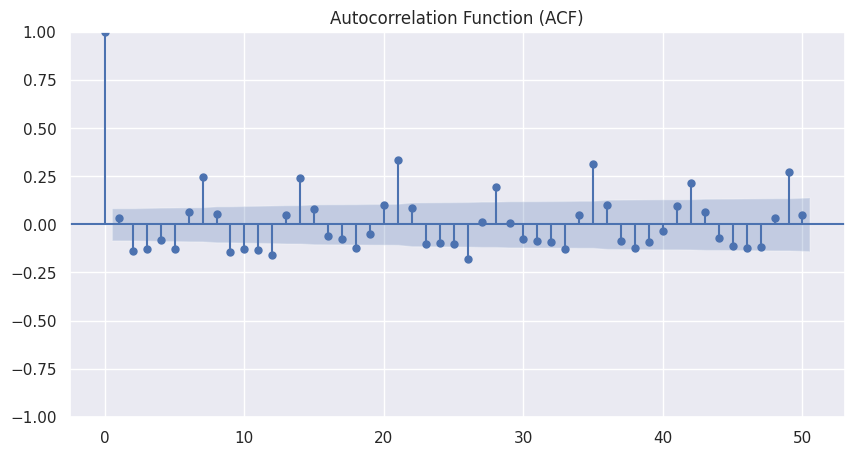

In [43]:
plt.rcParams['figure.figsize'] = (10, 5)
plot_acf(English_TS_diff, lags=50)
plt.title('Autocorrelation Function (ACF)')
plt.show()

- From the PACF plot, will go for p=1
- Initial ACF shows gradual decay of correlation which means presence of non-stationarity. Post first order differencing, Seasonal pattern is observed in ACF plot, so we will try q=1 and q=7
- And d=1, after first order differencing time series became stationary

#ARIMA

In [44]:
import warnings
warnings.filterwarnings("ignore", message="No frequency information was provided")

In [45]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [46]:
TS=English_TS.copy()

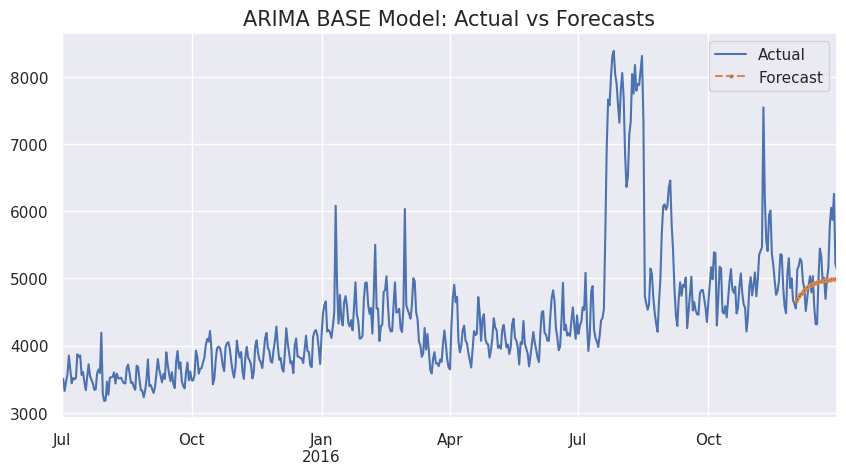


MAPE of Model : 0.06582
RMSE of Model : 472.693


In [47]:
n_forecast = 30


model = ARIMA(TS[:-n_forecast],
              order = (1,1,1))
model = model.fit()

predicted = model.forecast(steps= n_forecast, alpha = 0.05)


TS.plot(label = 'Actual')
predicted.plot(label = 'Forecast', linestyle='dashed', marker='o',markerfacecolor='green', markersize=2)
plt.legend(loc="upper right")
plt.title('ARIMA BASE Model: Actual vs Forecasts', fontsize = 15)
plt.show()


#Calculating MAPE & RMSE
actuals = TS.values[-n_forecast:]
errors = TS.values[-n_forecast:] - predicted.values

mape = np.mean(np.abs(errors)/ np.abs(actuals))
rmse = np.sqrt(np.mean(errors**2))

print()
print(f'MAPE of Model : {np.round(mape,5)}')

print(f'RMSE of Model : {np.round(rmse,3)}')

For English language Data subset, the MAPE observed in ARIMA model is found to be 0.06583

#SARIMAX

We will use SARIMAX model to handle seasonal component in time series and exogenous variable to include impact of campaign.

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [65]:
def sarimax_model(TS, n, p=0, d=0, q=0, P=0, D=0, Q=0, s=0, exog = []):

    #Creating SARIMAX Model with order(p,d,q) & seasonal_order=(P, D, Q, s)
    model = SARIMAX(TS[:-n], \
                    order =(p,d,q),
                    seasonal_order=(P, D, Q, s),
                    exog = exog[:-n],
                    initialization='approximate_diffuse')
    model_fit = model.fit()

    #Creating forecast for last n-values
    model_forecast = model_fit.forecast(n, dynamic = True, exog = pd.DataFrame(exog[-n:]))

    #plotting Actual & Forecasted values

    plt.figure(figsize = (15,5))
    TS[-60:].plot(label = 'Actual')
    model_forecast[-60:].plot(label = 'Forecast', color = 'orange',
                              linestyle='dashed', marker='o',markerfacecolor='green', markersize=5)
    plt.legend(loc="upper right")
    plt.title(f'SARIMAX Model: Actual vs Forecasts', fontsize = 15)
    plt.show()

    #Calculating MAPE & RMSE
    actuals = TS.values[-n:]
    errors = TS.values[-n:] - model_forecast.values

    mape = np.mean(np.abs(errors)/ np.abs(actuals))
    rmse = np.sqrt(np.mean(errors**2))

    print()
    print(f'MAPE of Model : {np.round(mape,5)}')
    print(f'RMSE of Model : {np.round(rmse,3)}')

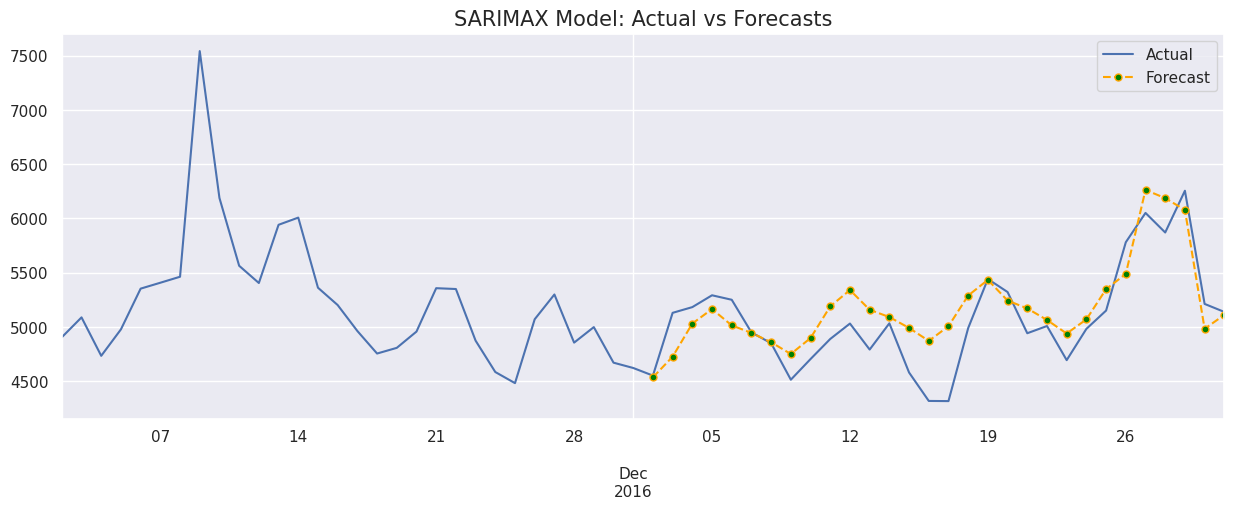


MAPE of Model : 0.04416
RMSE of Model : 270.855


In [66]:
exog = Exog_Campaign_eng['Exog'].to_numpy()
time_series = TS
test_size= 0.1
p,d,q, P,D,Q,s = 1,1,1,1,1,1,7
n = 30
sarimax_model(time_series, n, p=p, d=d, q=q, P=P, D=D, Q=Q, s=s, exog = exog)

MAPE for English Language data subset with Exogenous variable using SARIMAX is found to be 0.04416, lesser in comaprison to ARIMA 0.06583

##Hyperparameter Tuning

In [51]:
from itertools import product

Testing 64 parameter combinations...
Completed 1/64 | (p, d, q, P, D, Q, s) = (0, 0, 0, 0, 0, 0, 7) | MAPE: 0.88673, RMSE: 4689.082
Completed 2/64 | (p, d, q, P, D, Q, s) = (0, 0, 0, 0, 0, 1, 7) | MAPE: 0.87172, RMSE: 4574.980
Completed 3/64 | (p, d, q, P, D, Q, s) = (0, 0, 0, 0, 1, 0, 7) | MAPE: 0.06615, RMSE: 435.411
Completed 4/64 | (p, d, q, P, D, Q, s) = (0, 0, 0, 0, 1, 1, 7) | MAPE: 0.06683, RMSE: 464.881
Completed 5/64 | (p, d, q, P, D, Q, s) = (0, 0, 0, 1, 0, 0, 7) | MAPE: 0.06614, RMSE: 435.376
Completed 6/64 | (p, d, q, P, D, Q, s) = (0, 0, 0, 1, 0, 1, 7) | MAPE: 0.06602, RMSE: 460.197
Completed 7/64 | (p, d, q, P, D, Q, s) = (0, 0, 0, 1, 1, 0, 7) | MAPE: 0.06191, RMSE: 419.217
Completed 8/64 | (p, d, q, P, D, Q, s) = (0, 0, 0, 1, 1, 1, 7) | MAPE: 0.06848, RMSE: 464.138
Completed 9/64 | (p, d, q, P, D, Q, s) = (0, 0, 1, 0, 0, 0, 7) | MAPE: 0.93822, RMSE: 4826.502


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed 10/64 | (p, d, q, P, D, Q, s) = (0, 0, 1, 0, 0, 1, 7) | MAPE: 0.89949, RMSE: 4661.361
Completed 11/64 | (p, d, q, P, D, Q, s) = (0, 0, 1, 0, 1, 0, 7) | MAPE: 0.05964, RMSE: 401.424
Completed 12/64 | (p, d, q, P, D, Q, s) = (0, 0, 1, 0, 1, 1, 7) | MAPE: 0.06071, RMSE: 418.238


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed 13/64 | (p, d, q, P, D, Q, s) = (0, 0, 1, 1, 0, 0, 7) | MAPE: 0.05866, RMSE: 399.648


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed 14/64 | (p, d, q, P, D, Q, s) = (0, 0, 1, 1, 0, 1, 7) | MAPE: 0.05804, RMSE: 406.532
Completed 15/64 | (p, d, q, P, D, Q, s) = (0, 0, 1, 1, 1, 0, 7) | MAPE: 0.05499, RMSE: 391.836
Completed 16/64 | (p, d, q, P, D, Q, s) = (0, 0, 1, 1, 1, 1, 7) | MAPE: 0.06069, RMSE: 415.886
Completed 17/64 | (p, d, q, P, D, Q, s) = (0, 1, 0, 0, 0, 0, 7) | MAPE: 0.08030, RMSE: 490.524
Completed 18/64 | (p, d, q, P, D, Q, s) = (0, 1, 0, 0, 0, 1, 7) | MAPE: 0.10498, RMSE: 601.884
Completed 19/64 | (p, d, q, P, D, Q, s) = (0, 1, 0, 0, 1, 0, 7) | MAPE: 0.42785, RMSE: 2431.800
Completed 20/64 | (p, d, q, P, D, Q, s) = (0, 1, 0, 0, 1, 1, 7) | MAPE: 0.07117, RMSE: 442.122
Completed 21/64 | (p, d, q, P, D, Q, s) = (0, 1, 0, 1, 0, 0, 7) | MAPE: 0.12071, RMSE: 678.141
Completed 22/64 | (p, d, q, P, D, Q, s) = (0, 1, 0, 1, 0, 1, 7) | MAPE: 0.07113, RMSE: 441.968
Completed 23/64 | (p, d, q, P, D, Q, s) = (0, 1, 0, 1, 1, 0, 7) | MAPE: 0.29628, RMSE: 1674.764
Completed 24/64 | (p, d, q, P, D, Q, s) = (0, 1,

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed 34/64 | (p, d, q, P, D, Q, s) = (1, 0, 0, 0, 0, 1, 7) | MAPE: 0.10739, RMSE: 612.152
Completed 35/64 | (p, d, q, P, D, Q, s) = (1, 0, 0, 0, 1, 0, 7) | MAPE: 0.07689, RMSE: 463.355
Completed 36/64 | (p, d, q, P, D, Q, s) = (1, 0, 0, 0, 1, 1, 7) | MAPE: 0.04738, RMSE: 354.430


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed 37/64 | (p, d, q, P, D, Q, s) = (1, 0, 0, 1, 0, 0, 7) | MAPE: 0.13678, RMSE: 921.170


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed 38/64 | (p, d, q, P, D, Q, s) = (1, 0, 0, 1, 0, 1, 7) | MAPE: 0.08279, RMSE: 540.584
Completed 39/64 | (p, d, q, P, D, Q, s) = (1, 0, 0, 1, 1, 0, 7) | MAPE: 0.06029, RMSE: 396.462


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed 40/64 | (p, d, q, P, D, Q, s) = (1, 0, 0, 1, 1, 1, 7) | MAPE: 0.04770, RMSE: 356.364
Completed 41/64 | (p, d, q, P, D, Q, s) = (1, 0, 1, 0, 0, 0, 7) | MAPE: 0.07245, RMSE: 458.134
Completed 42/64 | (p, d, q, P, D, Q, s) = (1, 0, 1, 0, 0, 1, 7) | MAPE: 0.10782, RMSE: 614.996
Completed 43/64 | (p, d, q, P, D, Q, s) = (1, 0, 1, 0, 1, 0, 7) | MAPE: 0.06945, RMSE: 431.991


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed 44/64 | (p, d, q, P, D, Q, s) = (1, 0, 1, 0, 1, 1, 7) | MAPE: 0.05424, RMSE: 373.724


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed 45/64 | (p, d, q, P, D, Q, s) = (1, 0, 1, 1, 0, 0, 7) | MAPE: 0.12265, RMSE: 688.269


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed 46/64 | (p, d, q, P, D, Q, s) = (1, 0, 1, 1, 0, 1, 7) | MAPE: 0.09018, RMSE: 551.161
Completed 47/64 | (p, d, q, P, D, Q, s) = (1, 0, 1, 1, 1, 0, 7) | MAPE: 0.05669, RMSE: 383.795


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed 48/64 | (p, d, q, P, D, Q, s) = (1, 0, 1, 1, 1, 1, 7) | MAPE: 0.05390, RMSE: 372.553
Completed 49/64 | (p, d, q, P, D, Q, s) = (1, 1, 0, 0, 0, 0, 7) | MAPE: 0.08443, RMSE: 509.171
Completed 50/64 | (p, d, q, P, D, Q, s) = (1, 1, 0, 0, 0, 1, 7) | MAPE: 0.10759, RMSE: 614.006
Completed 51/64 | (p, d, q, P, D, Q, s) = (1, 1, 0, 0, 1, 0, 7) | MAPE: 0.42781, RMSE: 2431.568
Completed 52/64 | (p, d, q, P, D, Q, s) = (1, 1, 0, 0, 1, 1, 7) | MAPE: 0.07299, RMSE: 448.567
Completed 53/64 | (p, d, q, P, D, Q, s) = (1, 1, 0, 1, 0, 0, 7) | MAPE: 0.12329, RMSE: 690.724
Completed 54/64 | (p, d, q, P, D, Q, s) = (1, 1, 0, 1, 0, 1, 7) | MAPE: 0.07103, RMSE: 441.417
Completed 55/64 | (p, d, q, P, D, Q, s) = (1, 1, 0, 1, 1, 0, 7) | MAPE: 0.30147, RMSE: 1703.720
Completed 56/64 | (p, d, q, P, D, Q, s) = (1, 1, 0, 1, 1, 1, 7) | MAPE: 0.07527, RMSE: 459.108
Completed 57/64 | (p, d, q, P, D, Q, s) = (1, 1, 1, 0, 0, 0, 7) | MAPE: 0.08311, RMSE: 503.309
Completed 58/64 | (p, d, q, P, D, Q, s) = (1, 1,

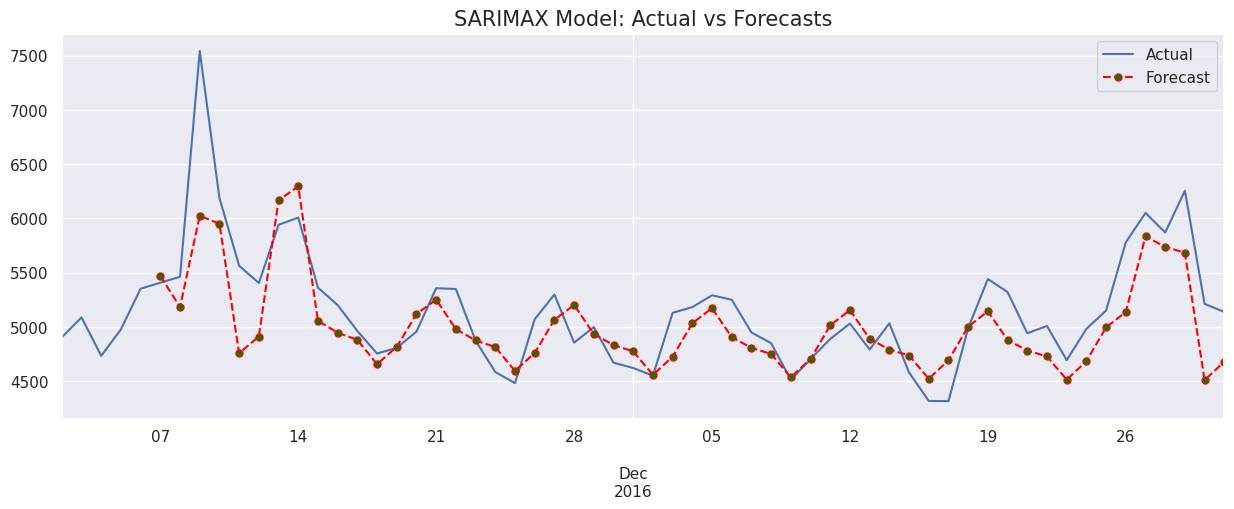

In [52]:
# Hyperparameter tuning function
def sarimax_hyperparameter_tuning(TS, n, exog, p_range, d_range, q_range, P_range, D_range, Q_range, s_range):
    results = []  # To store results for each combination

    # Generate all combinations of parameters
    param_combinations = list(product(p_range, d_range, q_range, P_range, D_range, Q_range, s_range))
    total_combinations = len(param_combinations)

    print(f"Testing {total_combinations} parameter combinations...")

    # Iterate over all parameter combinations
    for i, (p, d, q, P, D, Q, s) in enumerate(param_combinations):
        try:
            # Fit SARIMAX model
            model = SARIMAX(
                TS[:-n],
                order=(p, d, q),
                seasonal_order=(P, D, Q, s),
                exog=exog[:-n],
                initialization='approximate_diffuse'
            )
            model_fit = model.fit(disp=False)

            # Forecast for the test period
            model_forecast = model_fit.forecast(steps=n, exog=pd.DataFrame(exog[-n:]))

            # Calculate errors
            actuals = TS.values[-n:]
            errors = actuals - model_forecast.values
            mape = np.mean(np.abs(errors) / np.abs(actuals))
            rmse = np.sqrt(np.mean(errors**2))

            # Store results
            results.append({
                'p': p, 'd': d, 'q': q,
                'P': P, 'D': D, 'Q': Q, 's': s,
                'MAPE': mape, 'RMSE': rmse
            })

            print(f"Completed {i + 1}/{total_combinations} | (p, d, q, P, D, Q, s) = ({p}, {d}, {q}, {P}, {D}, {Q}, {s}) | MAPE: {mape:.5f}, RMSE: {rmse:.3f}")

        except Exception as e:
            print(f"Error with parameters (p, d, q, P, D, Q, s) = ({p}, {d}, {q}, {P}, {D}, {Q}, {s}): {e}")

    # Convert results to a DataFrame for easier analysis
    results_df = pd.DataFrame(results)

    # Get the best parameters based on RMSE
    best_params = results_df.loc[results_df['RMSE'].idxmin()]
    print("\nBest Parameters Based on RMSE:")
    print(best_params)

    return results_df, best_params

# Final SARIMAX model with best parameters
def sarimax_model_with_best_params(TS, n, exog, best_params):
    # Extract best parameters
    p, d, q = int(best_params['p']), int(best_params['d']), int(best_params['q'])
    P, D, Q, s = int(best_params['P']), int(best_params['D']), int(best_params['Q']), int(best_params['s'])

    # Fit the SARIMAX model with best parameters
    model = SARIMAX(
        TS[:-n],
        order=(p, d, q),
        seasonal_order=(P, D, Q, s),
        exog=exog[:-n],
        initialization='approximate_diffuse'
    )
    model_fit = model.fit(disp=False)

    # Forecast for the test period
    model_forecast = model_fit.forecast(steps=n, exog=pd.DataFrame(exog[-n:]))

    # Plot actual vs forecasted values
    plt.figure(figsize=(15, 5))
    TS[-60:].plot(label='Actual')
    model_forecast[-60:].plot(label='Forecast', color='red', linestyle='dashed', marker='o', markerfacecolor='green', markersize=5)
    plt.legend(loc="upper right")
    plt.title('SARIMAX Model: Actual vs Forecasts', fontsize=15)
    plt.show()

    return model_fit, model_forecast

# Example usage
time_series = TS
test_size = 0.1
n = int(test_size * len(time_series))

# Define ranges for parameters
p_range = range(0, 2)
d_range = range(0, 2)
q_range = range(0, 2)
P_range = range(0, 2)
D_range = range(0, 2)
Q_range = range(0, 2)
s_range = [7]  # Weekly seasonality

# Perform hyperparameter tuning
results_df, best_params = sarimax_hyperparameter_tuning(
    time_series, n, exog=Exog_Campaign_eng['Exog'].to_numpy(),
    p_range=p_range, d_range=d_range, q_range=q_range,
    P_range=P_range, D_range=D_range, Q_range=Q_range, s_range=s_range
)

# Fit final model and plot forecasts
final_model, final_forecast = sarimax_model_with_best_params(
    time_series, n, exog=Exog_Campaign_eng['Exog'].to_numpy(), best_params=best_params
)


#Pipeline for multiple series

- Forecasting for different languages
- Plot Results

Forecasting without Exogenous variable

In [53]:
language_time_series_transposed.index = pd.to_datetime(language_time_series_transposed.index)

In [54]:
language_time_series_transposed.head()

language,Chinese,English,French,German,Japanese,Russian,Spanish
2015-07-01,240.582042,3513.862203,475.150994,714.968405,580.647056,629.999601,1085.972919
2015-07-02,240.971125,3502.540258,478.203960,705.240535,666.674242,640.905259,1037.828910
2015-07-03,239.358622,3325.387138,459.840994,676.883812,602.292113,594.028143,954.431796
2015-07-04,241.667788,3462.089869,491.515491,621.151996,756.514843,558.732475,896.069961
2015-07-05,257.791433,3575.560857,482.563026,722.081525,725.731734,595.032932,974.515374


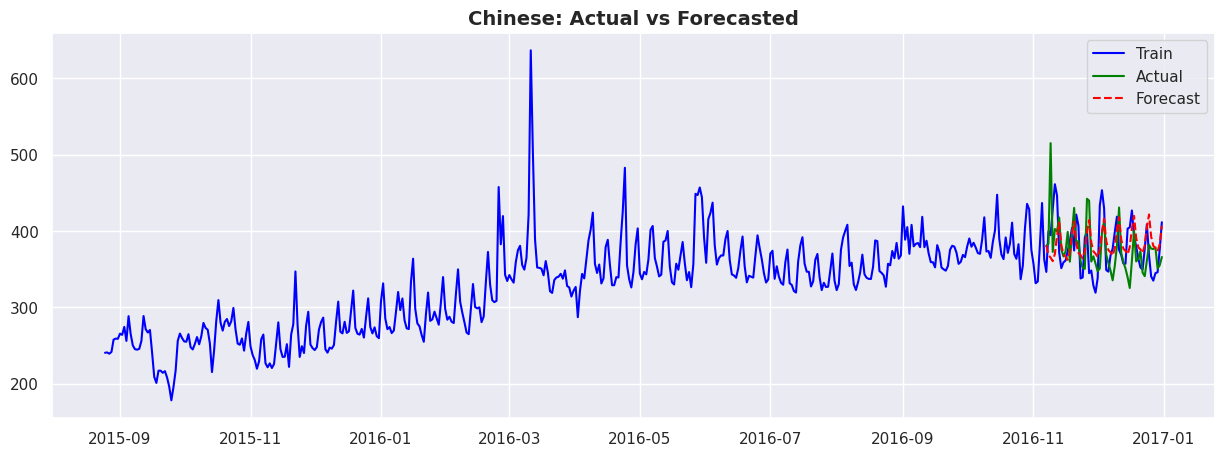

Language: Chinese | RMSE: 30.723 | MAPE: 0.05678



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


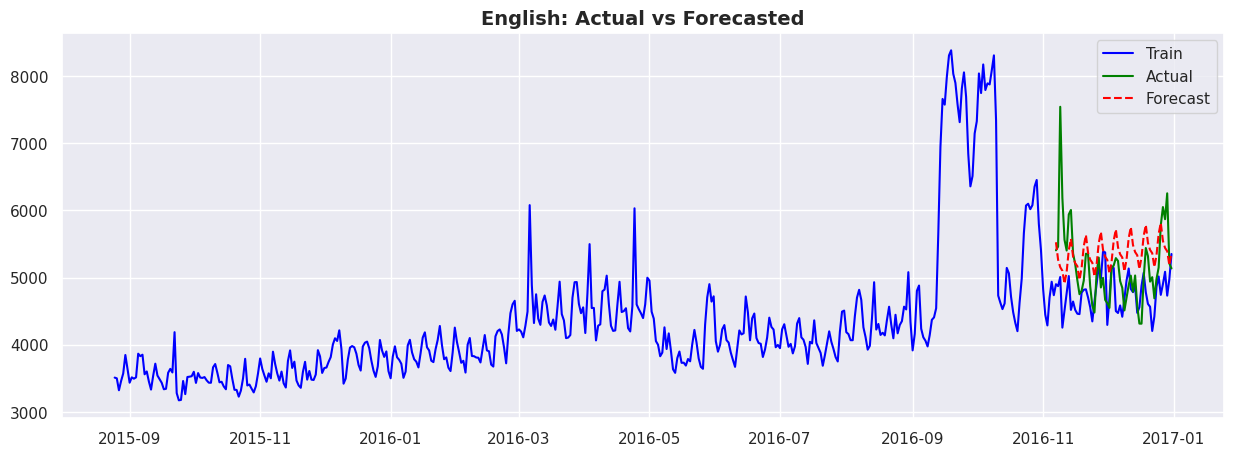

Language: English | RMSE: 591.779 | MAPE: 0.09071



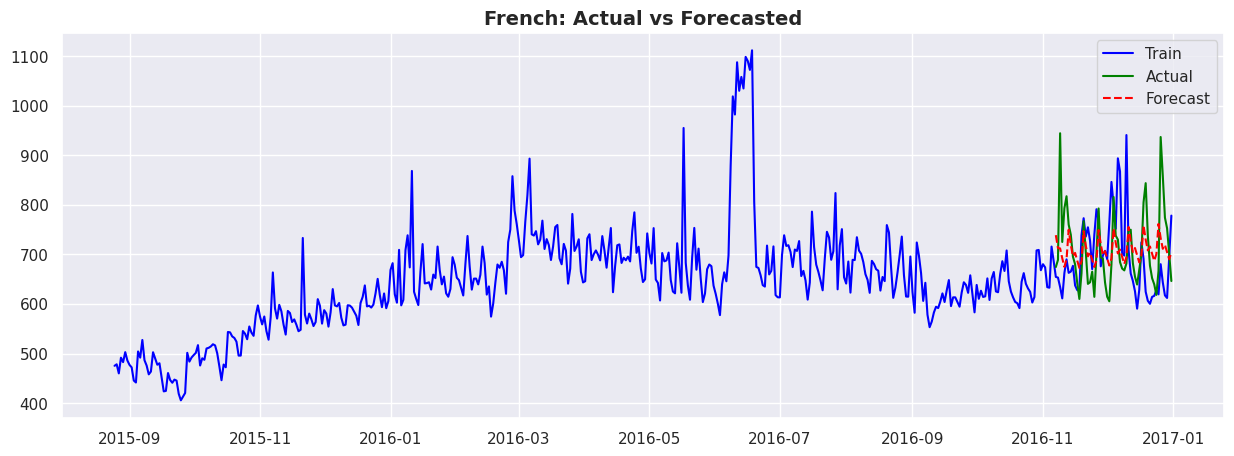

Language: French | RMSE: 67.723 | MAPE: 0.06778



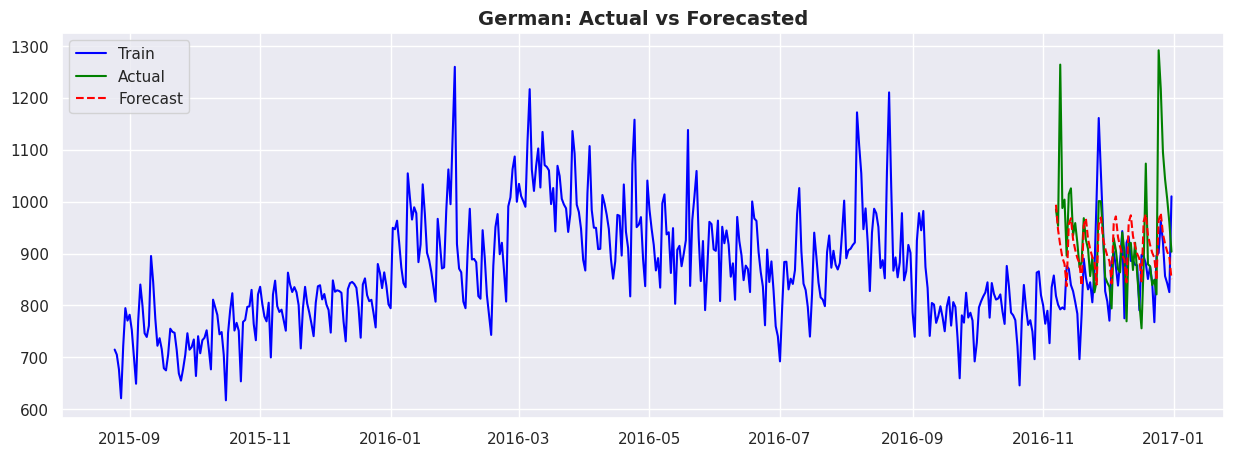

Language: German | RMSE: 93.268 | MAPE: 0.06620



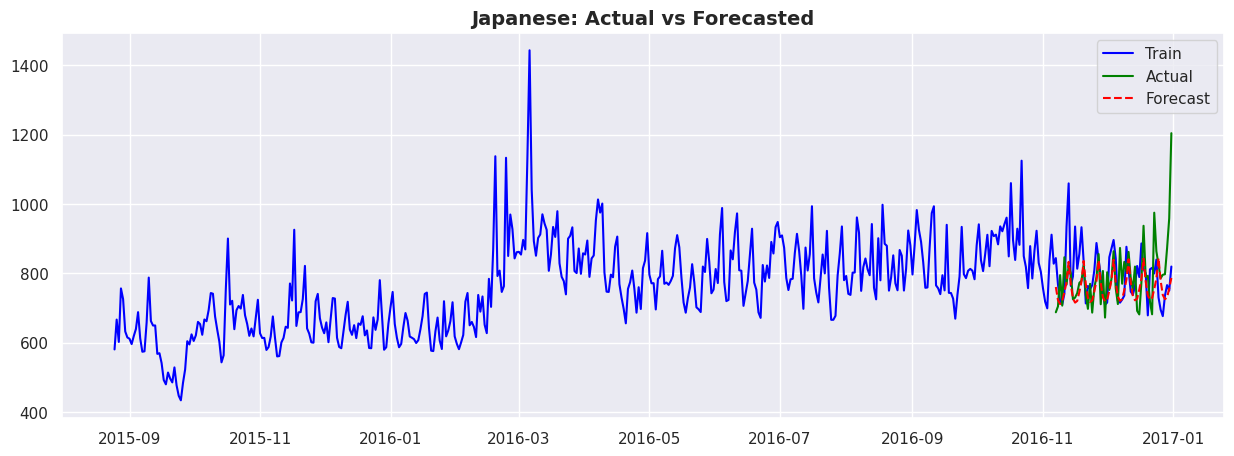

Language: Japanese | RMSE: 86.796 | MAPE: 0.06256



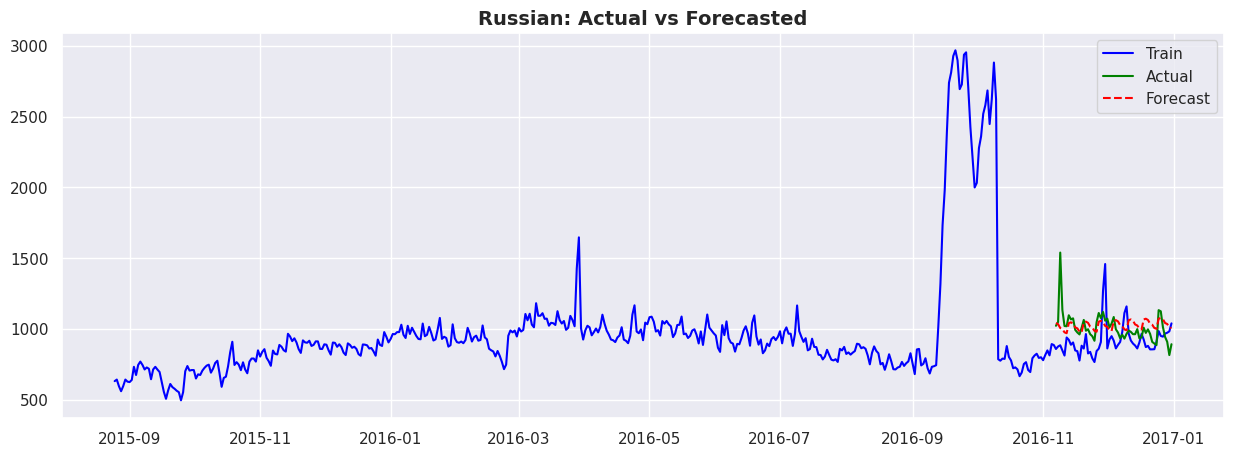

Language: Russian | RMSE: 101.569 | MAPE: 0.07009



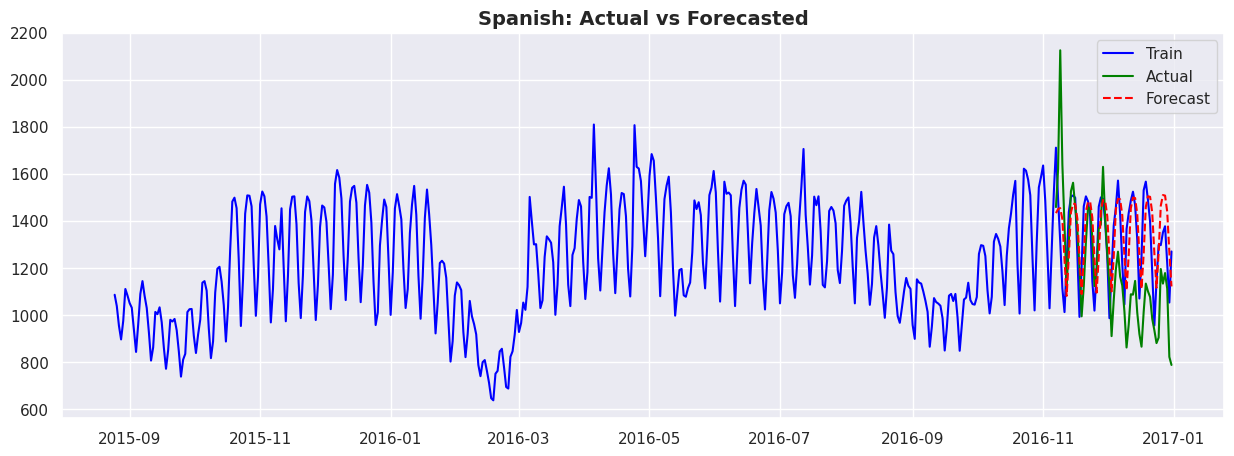

Language: Spanish | RMSE: 264.653 | MAPE: 0.20279

Forecasting Metrics:
   Language        RMSE      MAPE
0   Chinese   30.723218  0.056784
1   English  591.779088  0.090706
2    French   67.723131  0.067778
3    German   93.267843  0.066198
4  Japanese   86.796080  0.062562
5   Russian  101.569313  0.070087
6   Spanish  264.652614  0.202786


In [55]:
def sarimax_forecasting_pipeline(data, test_size=0.1, p=1, d=1, q=1, P=1, D=1, Q=1, s=7):
    """
    Perform SARIMAX forecasting for multiple time series.

    Args:
    - data (pd.DataFrame): Time series dataframe with dates as index and languages as columns.
    - test_size (float): Fraction of data to use for testing.
    - p, d, q (int): Non-seasonal SARIMAX parameters.
    - P, D, Q, s (int): Seasonal SARIMAX parameters.

    Returns:
    - results (pd.DataFrame): Metrics (RMSE and MAPE) for each time series.
    """
    results = []  # Store metrics for each time series

    for language in data.columns:
        T = data[language].dropna()  # Ensure no missing values
        n = int(test_size * len(T))  # Number of test samples

        # Split data into train and test
        train = T[:-n]
        test = T[-n:]

        # Fit SARIMAX model
        model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s), initialization='approximate_diffuse')
        model_fit = model.fit(disp=False)

        # Forecast
        forecast = model_fit.forecast(steps=n)

        # Calculate Metrics
        actuals = test.values
        errors = actuals - forecast.values

        rmse = np.sqrt(mean_squared_error(actuals, forecast))
        mape = np.mean(np.abs(errors) / np.abs(actuals))

        results.append({
            'Language': language,
            'RMSE': rmse,
            'MAPE': mape
        })

        # Plot actual vs forecasted values
        plt.figure(figsize=(15, 5))
        plt.plot(T.index[-len(train):], train, label='Train', color='blue')
        plt.plot(T.index[-n:], test, label='Actual', color='green')
        plt.plot(T.index[-n:], forecast, label='Forecast', color='red', linestyle='--')
        plt.title(f'{language}: Actual vs Forecasted', fontsize=14, fontweight='bold')
        plt.legend()
        plt.show()

        print(f"Language: {language} | RMSE: {rmse:.3f} | MAPE: {mape:.5f}\n")

    # Return results as a dataframe
    return pd.DataFrame(results)

# Example usage
# Assuming `language_time_series_transposed` is your dataframe with dates as index and 7 language columns.
results_df = sarimax_forecasting_pipeline(language_time_series_transposed)

# Display the results
print("Forecasting Metrics:")
print(results_df)


Post Analysing Forecasting for all languages without exogenous variable it is observed that Chinese language has lowest MAPE of 0.056784 and Spanish observed highest MAPE of 0.202

#Forecasting with Facebook Prophet

In [56]:
pip install prophet

In [57]:
from prophet import Prophet

##Forecasting with Exogenous Variable

In [58]:
time_series = language_time_series_transposed.copy()
time_series = time_series.reset_index()
time_series = time_series[['index', 'English']]
time_series.columns = ['ds', 'y']
exog = Exog_Campaign_eng.copy(deep = True)
time_series['exog'] = exog.values

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe0ove7ur/1oklvuel.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe0ove7ur/xixa310w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16289', 'data', 'file=/tmp/tmpe0ove7ur/1oklvuel.json', 'init=/tmp/tmpe0ove7ur/xixa310w.json', 'output', 'file=/tmp/tmpe0ove7ur/prophet_model18fyg99q/prophet_model-20241222150007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:00:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:00:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


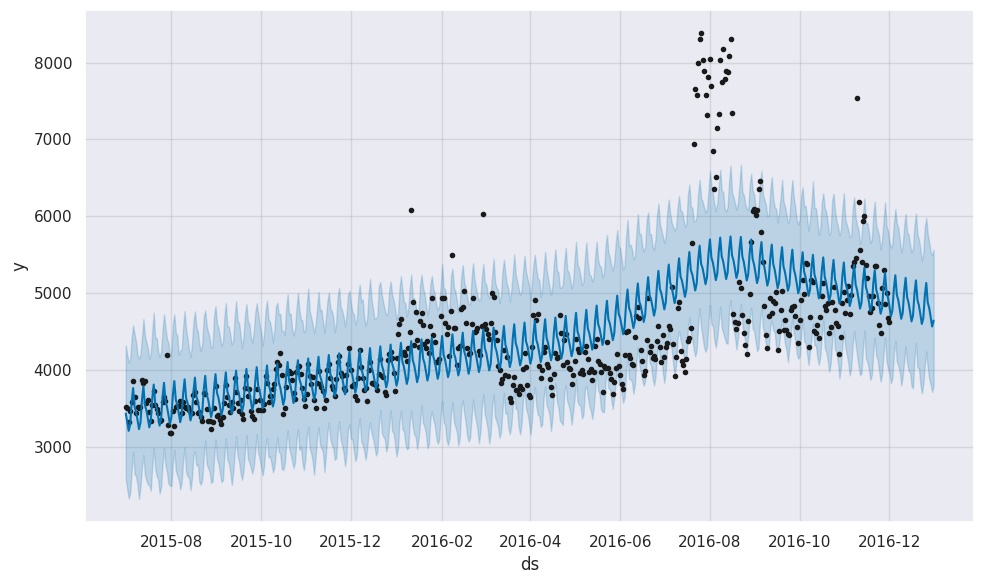

In [59]:
prophet1 = Prophet(weekly_seasonality=True)
prophet1.fit(time_series[['ds', 'y']][:-30])
future = prophet1.make_future_dataframe(periods=30, freq= 'D')
forecast = prophet1.predict(future)
fig1 = prophet1.plot(forecast)

In [60]:
actual1 = time_series['y'].values
f = forecast['yhat'].values

In [61]:
errors1 = abs(actual1 - f)
mape1 = np.mean(errors1/abs(actual1))
print(f'MAPE of Prophet Model (Without Exog Variable) : {np.round(mape1,5)}')

MAPE of Prophet Model (Without Exog Variable) : 0.08789


##Forecasting with Exogenous Variable

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe0ove7ur/im0dw6rw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe0ove7ur/3kxjxi27.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25317', 'data', 'file=/tmp/tmpe0ove7ur/im0dw6rw.json', 'init=/tmp/tmpe0ove7ur/3kxjxi27.json', 'output', 'file=/tmp/tmpe0ove7ur/prophet_modeljjwso29p/prophet_model-20241222150008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:00:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:00:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


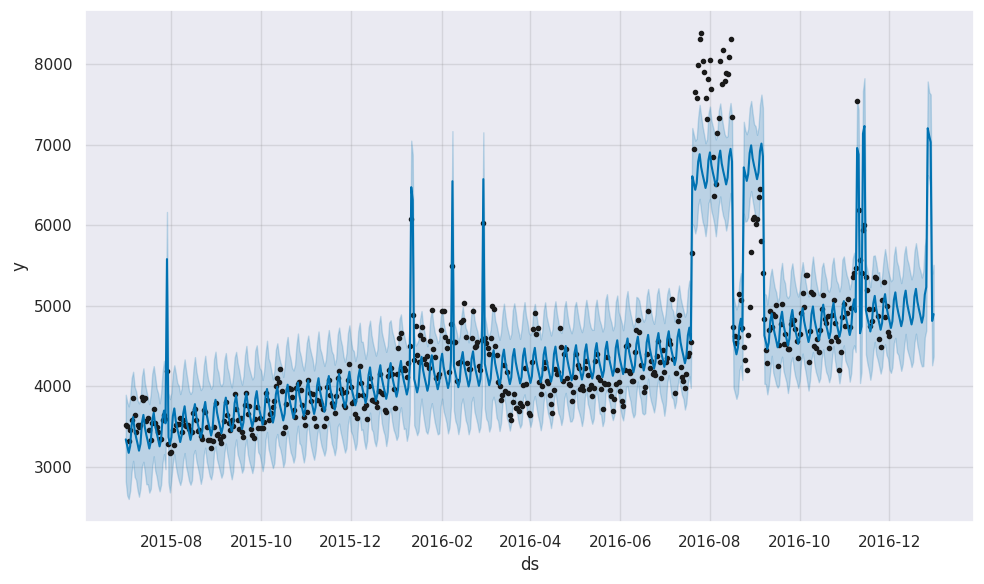

In [62]:
prophet2 = Prophet(weekly_seasonality=True)
prophet2.add_regressor('exog')
prophet2.fit(time_series[:-30])
#future2 = prophet2.make_future_dataframe(periods=30, freq= 'D')
forecast2 = prophet2.predict(time_series)
fig2 = prophet2.plot(forecast2)

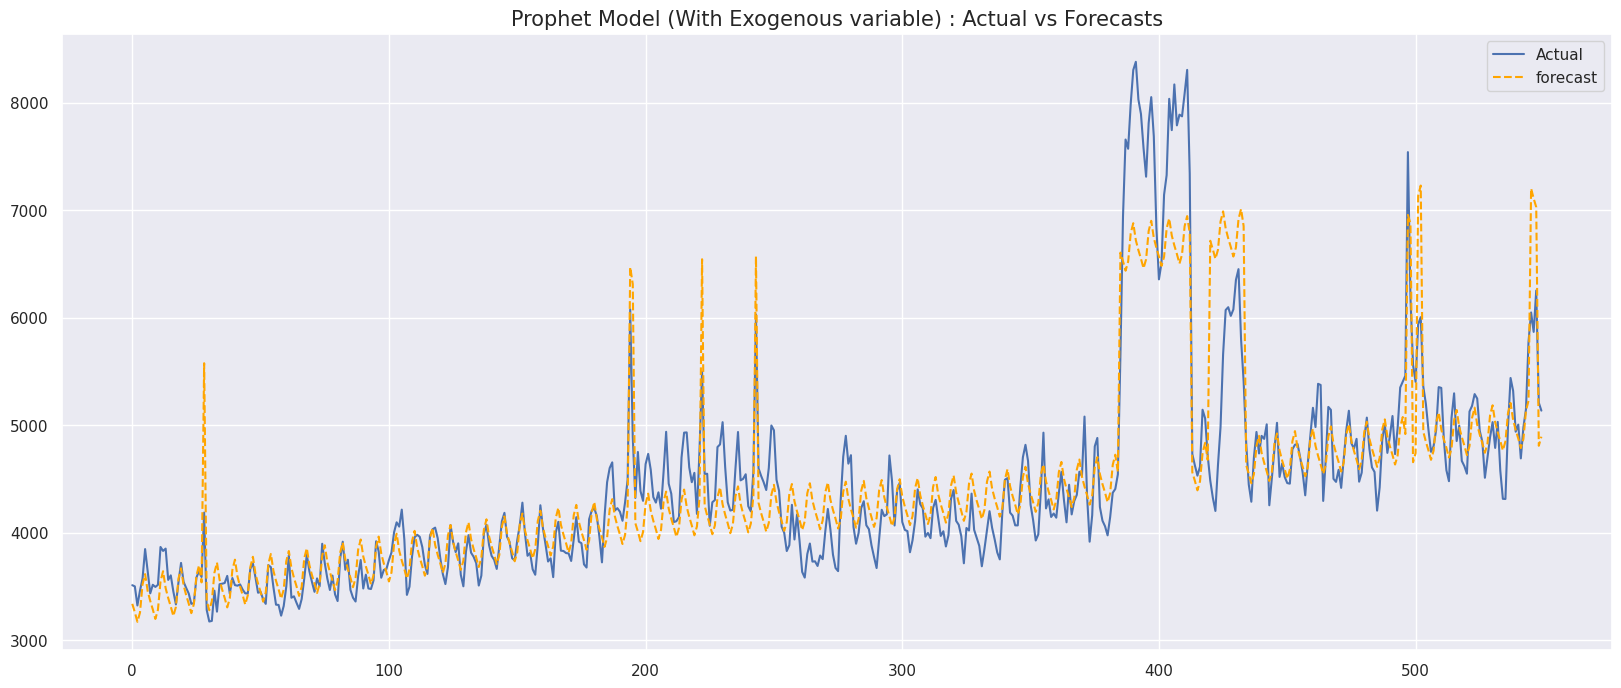

In [63]:
actual = time_series['y'].values
forecast = forecast2['yhat'].values

plt.figure(figsize = (20,8))
plt.plot(actual, label = 'Actual')
plt.plot(forecast, label = 'forecast', color = 'orange', linestyle='dashed')
plt.legend(loc="upper right")
plt.title(f'Prophet Model (With Exogenous variable) : Actual vs Forecasts', fontsize = 15)
plt.show()

In [64]:
errors = abs(actual - forecast)
mape = np.mean(errors/abs(actual))
print(f'MAPE of Prophet Model (With Exogenous Variable): {np.round(mape,5)}')

MAPE of Prophet Model (With Exogenous Variable): 0.05935


It is clearly observed that MAPE with Prophet model using Exogenous Variable 0.05935 is way less than without exogenous variable.

#Insights

- Highest number of pages belong to English language followed by Japanese and German
- 'all-access' has highest number of pages followed by desktop and mobile-web
- Highest number of pages belong to 'all-agents' (almost 1 lac) followed by 'spider' with almost 30k pages only
- For English language Data subset, the MAPE observed in ARIMA model is found to be 0.06583
- MAPE for English Language data subset with Exogenous variable using SARIMAX is found to be 0.04416, lesser in comaprison to ARIMA 0.06583
- Post Analysing Forecasting for all languages without exogenous variable in SARIMAX model it is observed that Chinese language has lowest MAPE of 0.056784 and Spanish observed highest MAPE of 0.202 with other languages ranging in between.
- It is clearly observed that MAPE with Prophet model using Exogenous Variable 0.05935 is way less than without exogenous variable.

#Recommendations

1. Ad Placement Strategy by Language

  - Focus on English-language pages due to their dominance in the dataset, ensuring maximum visibility for clients.
  - Leverage Chinese-language pages for campaigns targeting regions where Chinese is predominant, as the SARIMAX model indicates strong forecasting accuracy (lowest MAPE of 0.056784).
  - Exercise caution with Spanish-language pages as the forecasting accuracy is relatively lower (highest MAPE of 0.202). Consider improving the model or using additional exogenous variables for Spanish-language data.

2. Device-Specific Ad Targeting

  - Prioritize ads across 'all-access' platforms, given their higher page volume, to maximize reach.
  - Include platform-specific targeting for desktop and mobile-web audiences based on regional preferences and user behavior.

3. Model Selection for Forecasting

  - SARIMAX with exogenous variables is recommended for its improved accuracy (MAPE = 0.04416 for English subset) compared to ARIMA (MAPE = 0.06583).
  - For multi-language forecasting, continue leveraging SARIMAX, given its performance, but incorporate tailored exogenous variables specific to each language or region.

4. Utilizing Prophet for Optimization

  - Use the Prophet model with exogenous variables for scenarios requiring robust forecasting across languages. Its performance (MAPE = 0.05935 with exogenous variables) highlights its effectiveness in handling seasonality and incorporating external factors.

5. Regional Insights for Client Campaigns

  - Provide clients with language-specific insights derived from forecasting accuracy. For instance, guide them toward higher-confidence languages like Chinese and English for critical campaigns.
  - Offer targeted ad recommendations by region by aligning ad placements with regional language preferences and the corresponding forecast accuracy.

6. Improving Spanish-Language Forecasting

  - Investigate factors leading to higher MAPE in Spanish-language forecasting.
  - Consider additional exogenous variables like regional events, trends, or cultural aspects influencing page views.

7. Long-Term Optimization

  - Expand the exogenous variables used (e.g., trends, holidays, and major events) to improve forecasting accuracy across languages and platforms.
  - Regularly evaluate the model's performance and refine based on client feedback and newly available data.

8. Client Communication

  - Educate clients on the importance of language and device targeting based on forecasted page views to optimize ad performance and ROI.
  - Present these insights as a competitive advantage to showcase AdEase’s data-driven decision-making capabilities.


#Questionnaire

##Defining the problem statements and where can this and modifications of this be used?

Problem Statements

- Predict daily Wikipedia page views for 145,000 pages across languages.
- Optimize ad placements to maximize visibility and minimize cost.
- Provide regional and language-specific ad targeting insights.
- Improve forecasting accuracy using exogenous variables.

Applications
- Digital marketing: Ad targeting and budget optimization.
- Content publishing: Scheduling and engagement strategies.
- E-commerce: Dynamic ads and inventory planning.
- Media: Optimized publishing and revenue strategies.







##Write 3 inferences you made from the data visualizations

- Highest number of pages belong to English language followed by Japanese and German
- 'all-access' has highest number of pages followed by desktop and mobile-web
- Highest number of pages belong to 'all-agents' (almost 1 lac) followed by 'spider' with almost 30k pages only

##What does the decomposition of series do?

Decomposition breaks a time series into key components:

- Trend: Long-term movement or direction in the data.
- Seasonality: Regular, repeating patterns (e.g., daily, monthly).
- Residuals/Noise: Random variations or unexplained factors.

Purpose
- Identifies underlying patterns for better model selection.
- Helps understand data behavior for forecasting accuracy.

##What level of differencing gave you a stationary series?

In case Engish Language Data subset, differencing of level 1 helped achieve stationary series as verified by Dickey-Fuller Test in the analysis above

##Difference between arima, sarima & sarimax.

ARIMA (AutoRegressive Integrated Moving Average)

- Models data with no seasonality.
- Components:
  - AR: Dependence on past values.
  - I: Differencing to make the series stationary.
  - MA: Dependence on past forecast errors.

SARIMA (Seasonal ARIMA)

- Extends ARIMA to include seasonal patterns.
- Adds seasonal parameters: P, D, Q, S for AR, differencing, MA, and seasonal period.

SARIMAX (Seasonal ARIMA with eXogenous Variables)

- Further extends SARIMA by incorporating external predictors (exogenous variables).
- Useful when additional factors influence the series (e.g., holidays, events).

Key Use Case

- ARIMA: Non-seasonal data.
- SARIMA: Seasonal data.
- SARIMAX: Seasonal/non-seasonal data with external influences.

##Compare the number of views in different languages

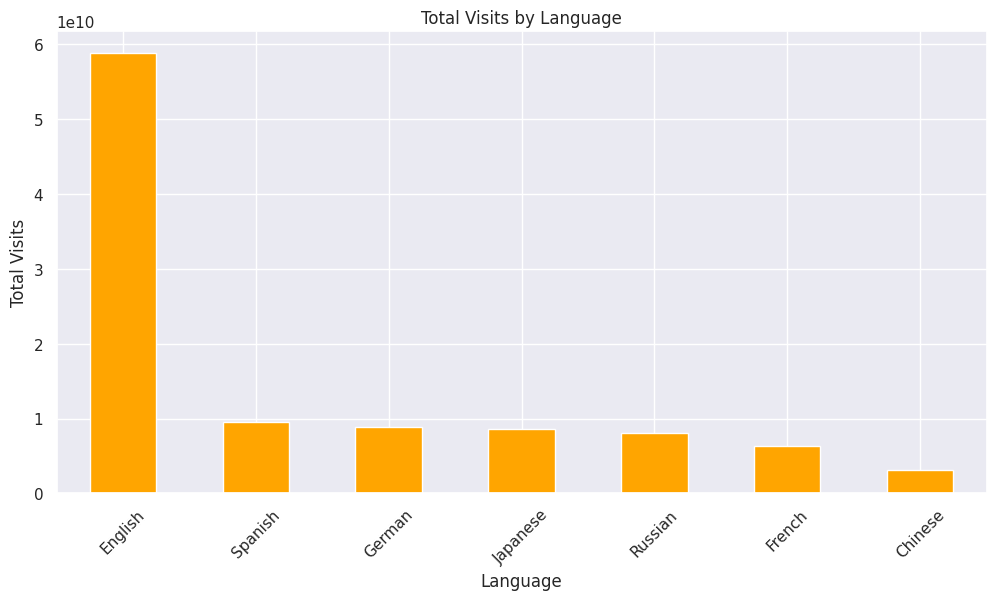

In [67]:
# Group by 'language' and calculate the total
language_totals = data_for_grouping.groupby('language').sum()

# Plot the total visits for each language
language_totals.sum(axis=1).sort_values(ascending=False).plot(
    kind='bar', figsize=(12, 6), color='orange', title="Total Visits by Language"
)
plt.xlabel('Language')
plt.ylabel('Total Visits')
plt.xticks(rotation=45)
plt.show()

As observed, Total number for Views is way highest for English followed by Spanish, German and others

##What other methods other than grid search would be suitable to get the model for all languages?

Other than grid search, we can use random search, Bayesian optimization, or genetic algorithms to tune time series model for all languages. These methods are more efficient when the search space is large or when computational resources are limited. Additionally, AutoML tools (e.g., Auto-sklearn, H2O AutoML) or specialized frameworks like Facebook Prophet or AutoTS can automate model selection and hyperparameter tuning for time series data.